In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bikesharing_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.shape

(731, 16)

In [4]:
#checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# EDA

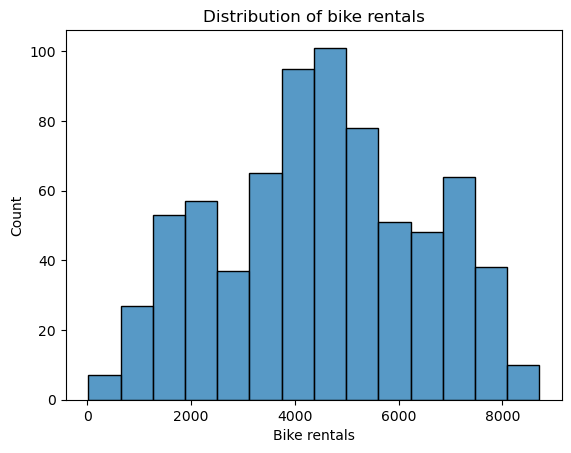

In [6]:
# let us look at the distribution of bike rentals with a histogram
sns.histplot(x = 'cnt', data = data)
plt.xlabel('Bike rentals')
plt.ylabel('Count')
plt.title('Distribution of bike rentals')
plt.show()

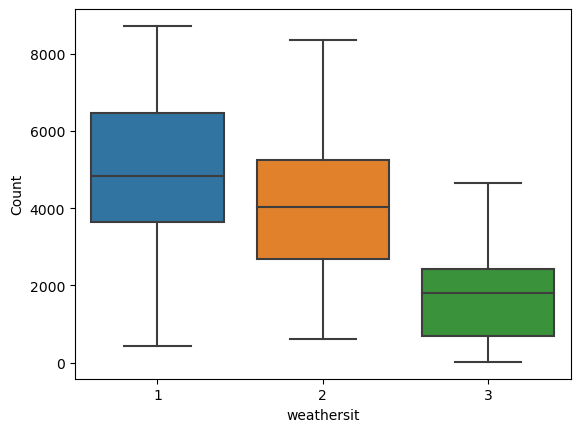

In [7]:
# let us see how weather affects bike rentals using box plots
sns.boxplot(x="weathersit",y="cnt",data=data)
plt.ylabel('Count')
plt.show()
# 1: Good weather conditions.
# 2: Moderate weather conditions.
# 3: Poor weather conditions.
# we see highest bike rentals in good weather and lowest in poor weather as expected.

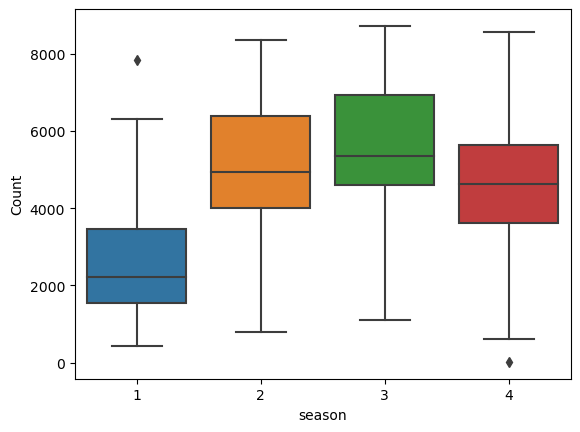

In [8]:
# now let us look at bike rentals distribution with season.
# 1:winter, 2:spring, 3:summer, 4:fall	
sns.boxplot(x="season",y="cnt",data=data)
plt.ylabel('Count')
plt.show()

In [9]:
data.groupby('weathersit')['cnt'].mean().round(0)
# 1: Good weather conditions. 2: Moderate weather conditions. 3: Poor weather conditions.
# clearly weather situation has an impact on bike rentals

weathersit
1    4877.0
2    4036.0
3    1803.0
Name: cnt, dtype: float64

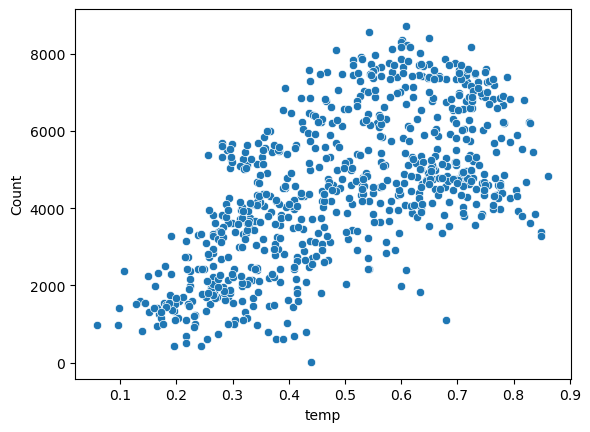

In [10]:
# we further look at affect of weather by looking at scatterplot of bike rentals vs temperature(temp)
sns.scatterplot(x = 'temp', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()

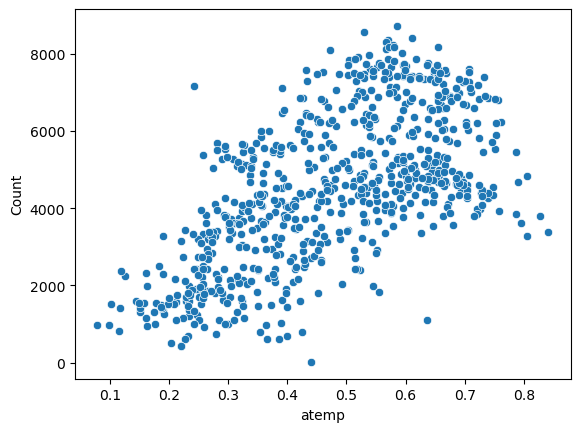

In [11]:
# we further look at affect of weather by looking at scatterplot of bike rentals vs feeling temperature(atemp)
sns.scatterplot(x = 'atemp', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()

In [12]:
# in above two plots we again see that at low temperatures the bike rentals are lower.

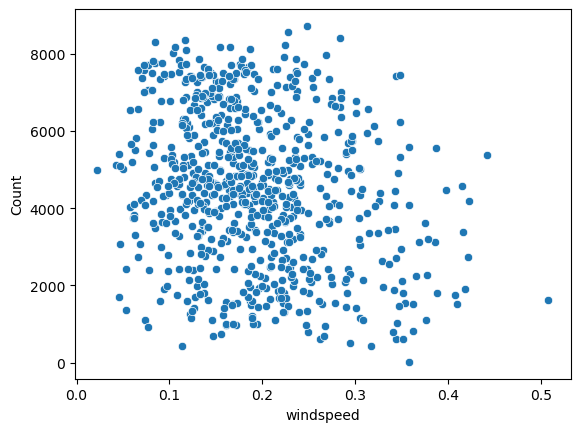

In [13]:
# Windspeed is another factor that affects weather so let us now look at how windspeed affects bike rentals.
sns.scatterplot(x = 'windspeed', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()
# we see most bike rentals as low wind speeds and few at higher speeds.

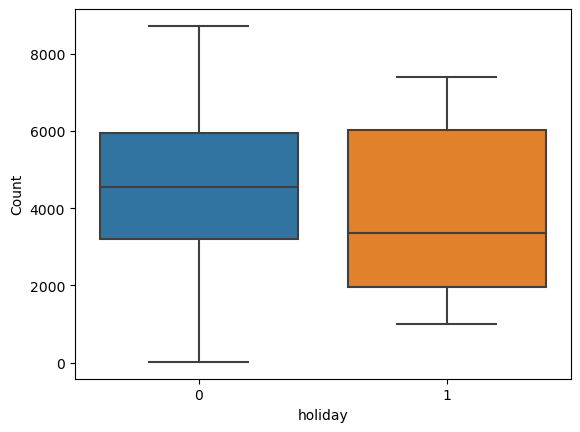

In [14]:
# we see now variation with holiday
# we see more rentals on holiday
sns.boxplot(x='holiday', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()

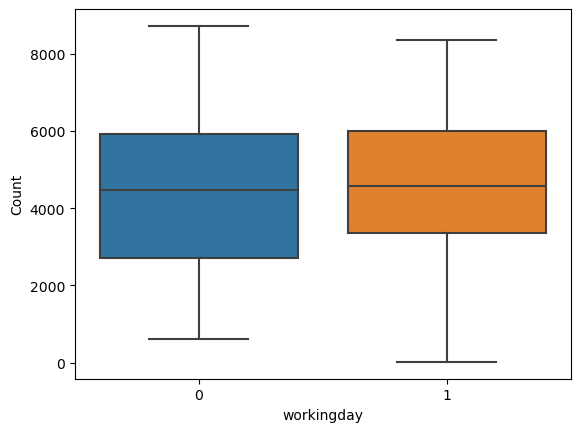

In [15]:
# we now see variation with workingday
# we see less rentals on working day i.e. neither holiday or weekend
sns.boxplot(x='workingday', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()

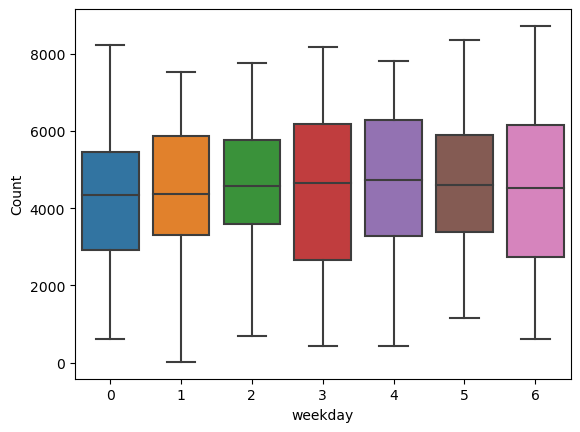

In [16]:
# we now see variation with weekday
# we see not a lot of variation with weekday so will not consider this variable in our analysis
sns.boxplot(x='weekday', y= 'cnt', data = data)
plt.ylabel('Count')
plt.show()

# Modelling

In [18]:
#we will drop other variables like instant, dteday, yr, mnth,casual, registered	 and weekday because they don't seem to be relevant to prediction
data = data[["season", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt"]]
data.head()

,season,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,2,0.344167,0.805833,0.160446,985
1,1,0,2,0.363478,0.696087,0.248539,801
2,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,1,0.200000,0.590435,0.160296,1562
4,1,1,1,0.226957,0.436957,0.186900,1600


## Implement the VIF method to select features

In [20]:
# VIF -> Variance inflation factor to remove variables which are not significant

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for i in data.columns:
  if i != "cnt":
    col_list.append(i)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0      season   6.915167
1  workingday   3.067397
2  weathersit  12.990600
3        temp   9.103080
4         hum  25.048640
5   windspeed   5.024767


In [21]:
# hum has a very high VIF so we first remove that and carry out the above process again. VIF greater than 10 is considered very high and indicates high-multicollinearity

In [22]:
data = data.drop(['hum'], axis = 1)

In [23]:
col_list = []

for i in data.columns:
  if i != "cnt":
    col_list.append(i)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature       VIF
0      season  6.301390
1  workingday  3.036749
2  weathersit  5.954014
3        temp  7.432676
4   windspeed  4.962825


In [24]:
# VIF values are not very high now. So we can continue with model building now

Features we are left with are: season, workingday, weathersit, temp, windspeed

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X = data.drop(['cnt'], axis = 1)
y = data[['cnt']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2)

In [29]:
LR = LinearRegression()

In [30]:
LR.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = LR.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.521324360683709

In [33]:
adjusted_r2_score = 1 - ( 1-r2_score(y_test, y_pred) ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
adjusted_r2_score

0.5043500472327767

## Implement the Backward elimination method to select features

In [35]:
data = pd.read_csv('bikesharing_day.csv')
data = data.drop(['instant', 'dteday', 'yr', 'mnth', 'casual', 'registered', 'weekday'], axis = 1)

X = data.drop(['cnt'], axis = 1)
y = data[['cnt']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2)

In [37]:
X_train.shape

(584, 8)

In [38]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [39]:
import statsmodels.api as sm 
X_train_bem = np.append(arr = np.ones((584,1)).astype(int), values = X_train, axis = 1) 
X_train_bem = X_train_bem[:,[0, 1, 2, 3, 4, 5, 6, 7, 8]] 
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_bem).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     75.71
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           8.05e-85
Time:                        16:33:13   Log-Likelihood:                -5032.0
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     575   BIC:                         1.012e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3135.6300    391.061      8.018      0.000    2367.548    3903.712
x1           418.1147     55.257      7.567      0.000     309.585     526.644
x2          -504.3166    362.671     -1.391      0.165   -1216.638     208.005
x3           130.1999    122.550      1.062      0.288    -110.500     370.900
x4          -480.8428    133.048     -3.614      0.000    -742.163    -219.523
x5          2815.6283   2251.031      1.251      0.212   -1605.617    7236.874
x6          3083.4588   2547.818      1.210      0.227   -1920.706    8087.624
x7         -2244.5862    531.186     -4.226      0.000   -3287.888   -1201.285
x8         -2553.6848    789.220     -3.236      0.001   -4103.791   -1003.579
==============================================================================
Omnibus:                        9.484   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.678
Skew:                           0.132   Prob(JB):                       0.0355
Kurtosis:                       2.548   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have selected significance level of 0.05. In table above we will look at features which has p-value higher than this p-value and delete the variable with the highest p-value.

We see x2, x3, x5, x6 have p-value higher than significance level but x3 has highest p-value so we delete x3 from the model.

Features we are left with are: ['season', 'holiday', 'weathersit', 'temp', 'atemp', 'hum','windspeed']

In [41]:
X_train_bem = X_train_bem[:,[0, 1, 2, 4, 5, 6, 7, 8]] 

regressor_OLS = sm.OLS(endog = y_train, exog = X_train_bem).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     86.35
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.46e-85
Time:                        16:33:13   Log-Likelihood:                -5032.6
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     576   BIC:                         1.012e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3212.2984    384.388      8.357      0.000    2457.326    3967.271
x1           416.4023     55.239      7.538      0.000     307.907     524.898
x2          -592.0254    353.189     -1.676      0.094   -1285.722     101.671
x3          -468.9492    132.591     -3.537      0.000    -729.371    -208.528
x4          2870.3846   2250.692      1.275      0.203   -1550.180    7290.949
x5          3054.6767   2547.959      1.199      0.231   -1949.746    8059.100
x6         -2261.1158    531.017     -4.258      0.000   -3304.082   -1218.149
x7         -2568.4929    789.185     -3.255      0.001   -4118.525   -1018.461
==============================================================================
Omnibus:                       10.672   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.035
Skew:                           0.119   Prob(JB):                       0.0297
Kurtosis:                       2.518   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see x2, x4 and x5 have p-value higher than significance level but x5 has highest p-value so we delete x5 from the model.

Features we are left with are: ['season', 'holiday', 'weathersit', 'temp', 'hum','windspeed']

In [43]:
X_train_bem = X_train_bem[:,[0, 1, 2, 3, 4, 6, 7]] 
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_bem).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           2.84e-86
Time:                        16:33:13   Log-Likelihood:                -5033.3
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     577   BIC:                         1.011e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3347.3689    367.645      9.105      0.000    2625.283    4069.455
x1           419.2343     55.210      7.593      0.000     310.798     527.671
x2          -607.3547    353.092     -1.720      0.086   -1300.856      86.147
x3          -477.7641    132.438     -3.607      0.000    -737.883    -217.646
x4          5538.4490    336.073     16.480      0.000    4878.374    6198.524
x5         -2214.6437    529.801     -4.180      0.000   -3255.218   -1174.069
x6         -2733.3188    777.412     -3.516      0.000   -4260.221   -1206.417
==============================================================================
Omnibus:                       12.768   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.284
Skew:                           0.144   Prob(JB):                       0.0159
Kurtosis:                       2.492   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see only x2 has p-value higher than significance level so we delete x2 from the model.

Features we are left with are: ['season', 'weathersit', 'temp', 'hum','windspeed']

In [45]:
X_train_bem = X_train_bem[:,[0, 1, 3, 4, 5, 6]] 
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_bem).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.07e-86
Time:                        16:33:13   Log-Likelihood:                -5034.8
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     578   BIC:                         1.011e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3311.3419    367.670      9.006      0.000    2589.211    4033.473
x1           421.3477     55.290      7.621      0.000     312.755     529.941
x2          -470.9132    132.602     -3.551      0.000    -731.353    -210.473
x3          5564.4510    336.301     16.546      0.000    4903.930    6224.972
x4         -2231.3458    530.609     -4.205      0.000   -3273.503   -1189.189
x5         -2717.2049    778.671     -3.490      0.001   -4246.575   -1187.835
==============================================================================
Omnibus:                       12.740   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.319
Skew:                           0.147   Prob(JB):                       0.0156
Kurtosis:                       2.494   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All p-values are now below the significance level.

In [47]:
X_train = X_train[['season', 'weathersit', 'temp', 'hum','windspeed']]
X_test = X_test[['season', 'weathersit', 'temp', 'hum','windspeed']]

In [48]:
LR = LinearRegression()

In [49]:
LR.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = LR.predict(X_test)

In [51]:
r2_score(y_test, y_pred)

0.5409147642180705

In [52]:
adjusted_r2_score = 1 - ( 1-r2_score(y_test, y_pred) ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
adjusted_r2_score

0.5246351459279311

## Implement the Forward selection method to select features

In [54]:
data = pd.read_csv('bikesharing_day.csv')
data = data.drop(['instant', 'dteday', 'yr', 'mnth', 'casual', 'registered', 'weekday'], axis = 1)

X = data.drop(['cnt'], axis = 1)
y = data[['cnt']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2)

In [56]:
def calculate_metric(model, x_test, y_test):
    return r2_score(y_test, model.predict(x_test)) #r2_score will be used as the metric to evaluate model

In [57]:
def forward_selection(X_train, X_test, y_train, y_test, num_features):
    chosen_features = []
    
    for _ in range(num_features):
        best_score = float('-inf')
        best_feature = None
        regressor = LinearRegression()
        
        for column_name in X_train.columns:
            if column_name not in chosen_features:
                current_features = chosen_features.copy()
                current_features.append(column_name)
                regressor.fit(X_train[current_features], y_train)
                model_performance = calculate_metric(regressor, X_test[current_features], y_test)
                
                if model_performance > best_score:
                    best_score = model_performance
                    best_feature = column_name
        
        if best_feature is not None:
            chosen_features.append(best_feature)
    
    return chosen_features


In [58]:
forward_selection(X_train, X_test, y_train, y_test, 5)

['atemp', 'weathersit', 'season', 'windspeed', 'hum']

In [59]:
X_train = X_train[['atemp', 'weathersit', 'season', 'windspeed', 'hum']]
X_test = X_test[['atemp', 'weathersit', 'season', 'windspeed', 'hum']]

In [60]:
LR = LinearRegression()

In [61]:
LR.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = LR.predict(X_test)

In [63]:
r2_score(y_test, y_pred)

0.5425615050403128

In [64]:
adjusted_r2_score = 1 - ( 1-r2_score(y_test, y_pred) ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
adjusted_r2_score

0.526340281814792

## model using Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
data = pd.read_csv('bikesharing_day.csv')
data = data.drop(['instant', 'dteday', 'yr', 'mnth', 'casual', 'registered', 'weekday'], axis = 1)

X = data.drop(['cnt'], axis = 1)
y = data[['cnt']]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2)

In [69]:
DT = DecisionTreeRegressor()

In [70]:
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
y_pred = DT.predict(X_test)

In [72]:
r2_score(y_test, y_pred)

0.2196999219918847

In [73]:
adjusted_r2_score = 1 - ( 1-r2_score(y_test, y_pred) ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
adjusted_r2_score

0.17446513486097948

## model using RandomForest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
RF = RandomForestRegressor()

In [77]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
y_pred = RF.predict(X_test)

In [79]:
r2_score(y_test, y_pred)

0.5577833635403597

In [80]:
adjusted_r2_score = 1 - ( 1-r2_score(y_test, y_pred) ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
adjusted_r2_score

0.5321476164992212